In [81]:
from skimage.io import imshow
from scipy.misc import imread
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import imresize
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras import optimizers
from keras.callbacks import LearningRateScheduler, EarlyStopping
from keras.layers import Dropout, Dense, Activation, Conv2D, MaxPooling2D, Flatten

In [82]:
def get_img_y(img):
    img_y = []
    for row in img:
        img_y.append((0.299 * row.T[0] + 0.587 * row.T[1] + 0.114 * row.T[2]) / 255)
    return np.asarray(img_y)

In [83]:
def get_resized(path, filename):
    img = imread(path + filename, mode='RGB')
    img_y = get_img_y(img)
    data = pd.read_csv('00_input/train/gt.csv', index_col='filename')
    dots = np.array(data.loc[filename])
    x_dots = dots[::2]
    y_dots = dots[1::2]
    img_resized = imresize(img_y, size=(64, 64), interp='cubic')
    x_dots_resized = x_dots / img_y.shape[1] * 2 - 1
    y_dots_resized = y_dots / img_y.shape[0] * 2 - 1
    dots_resized = []
    for i in range(len(x_dots_resized)):
        dots_resized.append(x_dots_resized[i])
        dots_resized.append(y_dots_resized[i])
    dots_resized = np.array(dots_resized)
    return img_resized, dots_resized

In [84]:
def load_images(path, n=10000):
    X = []
    y = []
    for filename in data.index.values[:n]:
        img_resized, dots_resized = get_resized(path, filename)
        X.append(img_resized.reshape(64, 64, 1))
        y.append(dots_resized)
    X = np.array(X)
    y = np.array(y)
    return X, y

In [85]:
path = '00_input/train/images/'

In [86]:
X, y = load_images(path)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(64, 64, 1)))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(64, kernel_size=(2, 2)))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, kernel_size=(2, 2)))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(1000))
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(1000))
model.add(Activation('sigmoid'))
model.add(Dense(28))

In [112]:
start = 0.03
stop = 0.001
nb_epoch = 10

In [113]:
early_stop = EarlyStopping(patience=100)
learning_rates = np.linspace(start, stop, nb_epoch)
change_lr = LearningRateScheduler(lambda epoch: float(learning_rates[epoch]))

In [114]:
sgd = optimizers.SGD(lr=start, momentum=0.9, nesterov=True)

In [115]:
model.compile(optimizer=sgd,
              loss='mean_squared_error')

In [116]:
model.fit(X_train, y_train,
          epochs=nb_epoch,
          batch_size=32,
          validation_data=(X_test, y_test), 
          callbacks=[change_lr, early_stop])

Train on 4800 samples, validate on 1200 samples
Epoch 1/10

4800/4800 [==============================] - 55s 11ms/step - loss: 0.0370 - val_loss: 0.0128
Epoch 2/10

4800/4800 [==============================] - 54s 11ms/step - loss: 0.0172 - val_loss: 0.0126
Epoch 3/10

4800/4800 [==============================] - 62s 13ms/step - loss: 0.0149 - val_loss: 0.0133
Epoch 4/10

4800/4800 [==============================] - 57s 12ms/step - loss: 0.0139 - val_loss: 0.0118
Epoch 5/10

4800/4800 [==============================] - 58s 12ms/step - loss: 0.0135 - val_loss: 0.0118
Epoch 6/10

4800/4800 [==============================] - 56s 12ms/step - loss: 0.0132 - val_loss: 0.0118
Epoch 7/10

4800/4800 [==============================] - 58s 12ms/step - loss: 0.0131 - val_loss: 0.0119
Epoch 8/10

4800/4800 [==============================] - 57s 12ms/step - loss: 0.0129 - val_loss: 0.0120
Epoch 9/10

4800/4800 [==============================] - 56s 12ms/step - loss: 0.0128 - val_loss: 0.0119
Epoch 1

In [117]:
proba = model.predict_proba(X)


6000/6000 [==============================] - 20s 3ms/step


/home/nimloth/anaconda3/lib/python3.5/site-packages/keras/models.py:1024: UserWarning: Network returning invalid probability values. The last layer might not normalize predictions into probabilities (like softmax or sigmoid would).
  warnings.warn('Network returning invalid probability values. '


In [118]:
print(proba[0])

[-0.60019559 -0.5351702  -0.21739583 -0.55906391  0.19693628 -0.55464309
  0.58038014 -0.55003673 -0.49300161 -0.36980423 -0.34906572 -0.37910879
 -0.21471494 -0.36589599  0.22018082 -0.36741939  0.35593647 -0.39174932
  0.50556904 -0.3750397  -0.0109343   0.04583376 -0.27022481  0.36040992
  0.00360273  0.38010228  0.26799774  0.35360378]


In [516]:
X_test, y_test = load_images(path, n=100)

In [119]:
y_pred = model.predict_proba(X_test)


1200/1200 [==============================] - 4s 3ms/step


/home/nimloth/anaconda3/lib/python3.5/site-packages/keras/models.py:1024: UserWarning: Network returning invalid probability values. The last layer might not normalize predictions into probabilities (like softmax or sigmoid would).
  warnings.warn('Network returning invalid probability values. '


In [518]:
# from sklearn.metrics import mean_squared_error

In [129]:
# print(mean_squared_error(y_true=y_test, y_pred=y_pred) * 64)

In [132]:
x_dots_resized = y_pred[130][::2]
y_dots_resized = y_pred[130][1::2]
img_resized = X_test[130].reshape(64, 64)

In [133]:
for i in range(0, len(y_dots_resized)):
    img_resized[int(y_dots_resized[i] * 32 + 32)][int(x_dots_resized[i] * 32 + 32)] = 1

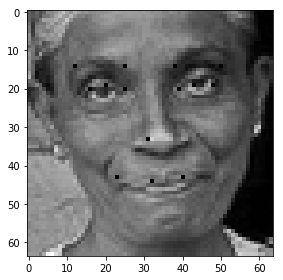

In [134]:
imshow(img_resized)
plt.show()